In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df=pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_pymaceuticals_df=pd.merge(mouse_drug_df, clinical_trial_df, how='outer', on='Mouse ID')

# Display the data table for preview
combined_pymaceuticals_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
pymaceuticals_grpby_df=combined_pymaceuticals_df.groupby(['Drug', 'Timepoint'])
print(pymaceuticals_grpby_df)

In [3]:
pymaceuticals_mean=pymaceuticals_grpby_df["Tumor Volume (mm3)"].mean()
pymaceuticals_mean

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
           25           39.939528
           30           38.769339
           35           37.816839
           40           36.958001
           45           36.236114
Ceftamin   0            45.000000
           5            46.503051
           10           48.285125
           15           50.094055
           20           52.157049
           25           54.287674
           30           56.769517
           35           58.827548
           40           61.467895
           45           64.132421
Infubinol  0            45.000000
           5            47.062001
           10           49.403909
           15           51.296397
           20           53.197691
           25           55.715252
           30           58.299397
           35           60.742461
           40           63.

In [4]:
pymaceuticals_means_df=pd.DataFrame(pymaceuticals_mean).reset_index()
pymaceuticals_means_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
pymaceuticals_sem=pymaceuticals_grpby_df["Tumor Volume (mm3)"].sem()
pymaceuticals_sem

Drug       Timepoint
Capomulin  0            0.000000
           5            0.448593
           10           0.702684
           15           0.838617
           20           0.909731
           25           0.881642
           30           0.934460
           35           1.052241
           40           1.223608
           45           1.223977
Ceftamin   0            0.000000
           5            0.164505
           10           0.236144
           15           0.332053
           20           0.359482
           25           0.439356
           30           0.490620
           35           0.692248
           40           0.708505
           45           0.902358
Infubinol  0            0.000000
           5            0.235102
           10           0.282346
           15           0.357705
           20           0.476210
           25           0.550315
           30           0.631061
           35           0.984155
           40           1.055220
           45         

In [6]:
pymaceuticals_sem_df=pd.DataFrame(pymaceuticals_sem).reset_index()
pymaceuticals_sem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [7]:
Restruct_Data=pymaceuticals_means_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
Restruct_Data.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


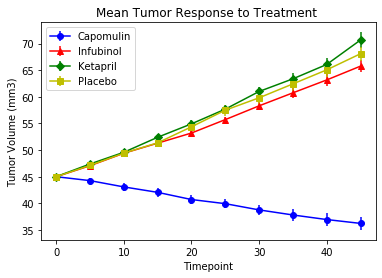

In [8]:
fig, ax=plt.subplots()
Capomulin_error = pymaceuticals_sem_df.loc[pymaceuticals_sem_df["Drug"] == "Capomulin", "Tumor Volume (mm3)"]
Infubinol_error = pymaceuticals_sem_df.loc[pymaceuticals_sem_df["Drug"] == "Infubinol", "Tumor Volume (mm3)"]
Ketapril_error = pymaceuticals_sem_df.loc[pymaceuticals_sem_df["Drug"] == "Ketapril", "Tumor Volume (mm3)"]
Placebo_error = pymaceuticals_sem_df.loc[pymaceuticals_sem_df["Drug"] == "Placebo", "Tumor Volume (mm3)"]
Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
ax.errorbar(Time, Restruct_Data["Capomulin"] , yerr= Capomulin_error, label= "Capomulin", marker= "o", color="b")
ax.errorbar(Time, Restruct_Data["Infubinol"] , yerr= Infubinol_error, label= "Infubinol", marker= "^", color="r")
ax.errorbar(Time, Restruct_Data["Ketapril"] , yerr= Ketapril_error, label= "Ketapril", marker= "D", color="g")
ax.errorbar(Time, Restruct_Data["Placebo"] , yerr= Placebo_error , label= "Placebo", marker= "s", color="y")
plt.legend()
plt.title("Mean Tumor Response to Treatment ")
ax.set_xlabel("Timepoint")
ax.set_ylabel("Tumor Volume (mm3)")
plt.show()

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame
pymaceuticals_grpby_df=combined_pymaceuticals_df.groupby(['Drug', 'Timepoint'])
print(pymaceuticals_grpby_df)

In [10]:
pymaceuticals_mean2=pymaceuticals_grpby_df["Metastatic Sites"].mean()
pymaceuticals_mean2

Drug       Timepoint
Capomulin  0            0.000000
           5            0.160000
           10           0.320000
           15           0.375000
           20           0.652174
           25           0.818182
           30           1.090909
           35           1.181818
           40           1.380952
           45           1.476190
Ceftamin   0            0.000000
           5            0.380952
           10           0.600000
           15           0.789474
           20           1.111111
           25           1.500000
           30           1.937500
           35           2.071429
           40           2.357143
           45           2.692308
Infubinol  0            0.000000
           5            0.280000
           10           0.666667
           15           0.904762
           20           1.050000
           25           1.277778
           30           1.588235
           35           1.666667
           40           2.100000
           45         

In [11]:
pymaceuticals_means2_df=pd.DataFrame(pymaceuticals_mean2).reset_index()
pymaceuticals_means2_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [12]:
pymaceuticals_sem2=pymaceuticals_grpby_df["Metastatic Sites"].sem()
pymaceuticals_sem2

Drug       Timepoint
Capomulin  0            0.000000
           5            0.074833
           10           0.125433
           15           0.132048
           20           0.161621
           25           0.181818
           30           0.172944
           35           0.169496
           40           0.175610
           45           0.202591
Ceftamin   0            0.000000
           5            0.108588
           10           0.152177
           15           0.180625
           20           0.241034
           25           0.258831
           30           0.249479
           35           0.266526
           40           0.289128
           45           0.286101
Infubinol  0            0.000000
           5            0.091652
           10           0.159364
           15           0.194015
           20           0.234801
           25           0.265753
           30           0.227823
           35           0.224733
           40           0.314466
           45         

In [13]:
pymaceuticals_sem2_df=pd.DataFrame(pymaceuticals_sem2).reset_index()
pymaceuticals_sem2_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [14]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
Restruct_Data2=pymaceuticals_means2_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
Restruct_Data2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


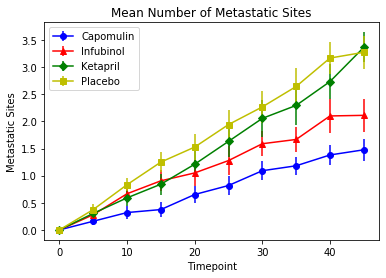

In [15]:
fig, ax=plt.subplots()
Capomulin_error = pymaceuticals_sem2_df.loc[pymaceuticals_sem2_df["Drug"] == "Capomulin", "Metastatic Sites"]
Infubinol_error = pymaceuticals_sem2_df.loc[pymaceuticals_sem2_df["Drug"] == "Infubinol", "Metastatic Sites"]
Ketapril_error = pymaceuticals_sem2_df.loc[pymaceuticals_sem2_df["Drug"] == "Ketapril", "Metastatic Sites"]
Placebo_error = pymaceuticals_sem2_df.loc[pymaceuticals_sem2_df["Drug"] == "Placebo", "Metastatic Sites"]
Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
ax.errorbar(Time, Restruct_Data2["Capomulin"] , yerr= Capomulin_error, label= "Capomulin", marker= "o", color="b")
ax.errorbar(Time, Restruct_Data2["Infubinol"] , yerr= Infubinol_error, label= "Infubinol", marker= "^", color="r")
ax.errorbar(Time, Restruct_Data2["Ketapril"] , yerr= Ketapril_error, label= "Ketapril", marker= "D", color="g")
ax.errorbar(Time, Restruct_Data2["Placebo"] , yerr= Placebo_error , label= "Placebo", marker= "s", color="y")
plt.legend()
plt.title("Mean Number of Metastatic Sites")
ax.set_xlabel("Timepoint")
ax.set_ylabel("Metastatic Sites")
plt.show()

## Survival Rates

In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame
pymaceuticals_grpby_df=combined_pymaceuticals_df.groupby(['Drug', 'Timepoint'])
print(pymaceuticals_grpby_df)

In [17]:
pymaceuticals_counts=pymaceuticals_grpby_df["Mouse ID"].count()
pymaceuticals_counts

Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
           25           22
           30           22
           35           22
           40           21
           45           21
Ceftamin   0            25
           5            21
           10           20
           15           19
           20           18
           25           18
           30           16
           35           14
           40           14
           45           13
Infubinol  0            25
           5            25
           10           21
           15           21
           20           20
           25           18
           30           17
           35           12
           40           10
           45            9
                        ..
Ramicane   0            25
           5            25
           10           24
           15           24
           20           23
       

In [18]:
pymaceuticals_counts_df=pd.DataFrame(pymaceuticals_counts).reset_index()
pymaceuticals_counts_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [19]:
pymaceuticals_counts_df=pymaceuticals_counts_df.rename(columns={"Mouse ID":"Mouse Counts"})
pymaceuticals_counts_df.head()

,Drug,Timepoint,Mouse Counts
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [20]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame
Restruct_Data3=pymaceuticals_counts_df.pivot(index='Timepoint', columns='Drug', values='Mouse Counts')
Restruct_Data3.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


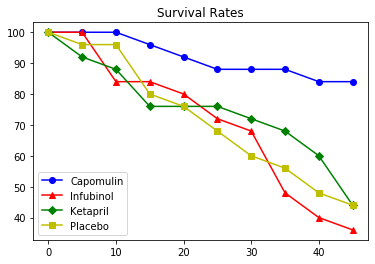

In [22]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
plt.plot(Time, (Restruct_Data3["Capomulin"]/25)*100 ,label= "Capomulin", marker= "o", color="b")
plt.plot(Time, (Restruct_Data3["Infubinol"]/25)*100 , label= "Infubinol", marker= "^", color="r")
plt.plot(Time, (Restruct_Data3["Ketapril"]/25)*100 , label= "Ketapril", marker= "D", color="g")
plt.plot(Time, (Restruct_Data3["Placebo"]/25)*100 , label= "Placebo", marker= "s", color="y")
plt.legend()
plt.title("Survival Rates")
ax.set_xlabel("Timepoint")
ax.set_ylabel("Survival Rate (%)")
plt.show()

## Summary Bar Graph

In [23]:
# Calculate the percent changes for each drug

# Display the data to confirm
Start_Tumor_Vol= 45
pymaceuticals_per_chng=((Restruct_Data.loc[45, :]-Start_Tumor_Vol)/Start_Tumor_Vol)*100
pymaceuticals_per_chng.head()

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Name: 45, dtype: float64

In [25]:
pymaceuticals_perchng_df=pd.DataFrame(pymaceuticals_per_chng).reset_index()
pymaceuticals_perchng_df.head()

,Drug,45
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347


In [28]:
pymaceuticals_perchng_df=pymaceuticals_perchng_df.rename(columns={45:"Percent Change"})
pymaceuticals_perchng_df.head()

,Drug,Percent Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347


In [33]:
pymaceuticals_perchng_df=pd.DataFrame(pymaceuticals_perchng_df).round(decimals=2)
pymaceuticals_perchng_df.head()

,Drug,Percent Change
0,Capomulin,-19.48
1,Ceftamin,42.52
2,Infubinol,46.12
3,Ketapril,57.03
4,Naftisol,53.92


In [34]:
# Store all Relevant Percent Changes into a Tuple

Drugs_perchng=list(pymaceuticals_perchng_df[['Drug', 'Percent Change']].itertuples(index=False, name=None))
Drugs_perchng

[('Capomulin', -19.48),
 ('Ceftamin', 42.52),
 ('Infubinol', 46.12),
 ('Ketapril', 57.03),
 ('Naftisol', 53.92),
 ('Placebo', 51.3),
 ('Propriva', 47.24),
 ('Ramicane', -22.32),
 ('Stelasyn', 52.09),
 ('Zoniferol', 46.58)]

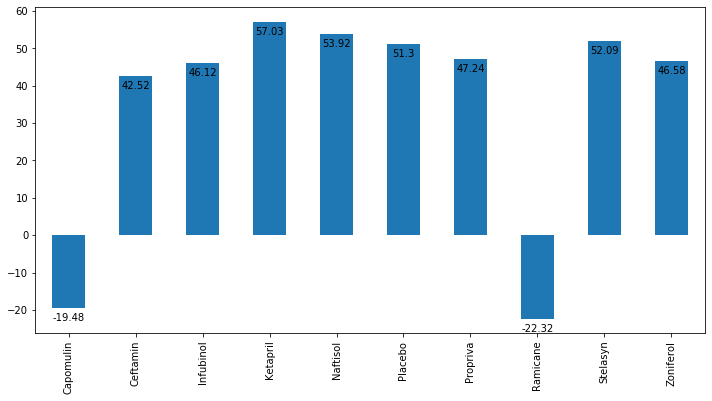

In [51]:
# Show the Figure
x_labels = [val[0] for val in Drugs_perchng]
y_labels = [val[1] for val in Drugs_perchng]
plt.figure(figsize=(12, 6))
ax=pd.Series(y_labels).plot(kind='bar')
ax.set_xticklabels(x_labels)

rects=ax.patches

for rect, label in zip(rects, y_labels):
    height=rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height-4, label, ha='center', va='bottom')

